<a href="https://colab.research.google.com/github/chikakoto/facial-expression-recognition/blob/main/notebooks/1_0_RH_Initial_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Source 
https://www.kaggle.com/datasets/msambare/fer2013
https://drive.google.com/file/d/168XK2dmyPg9d6AI3cgbxhCXdIow7uVK-/view?usp=sharing 


In [1]:
!gdown --id 168XK2dmyPg9d6AI3cgbxhCXdIow7uVK- -O archive.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=168XK2dmyPg9d6AI3cgbxhCXdIow7uVK-
To: /content/archive.zip
100% 63.3M/63.3M [00:00<00:00, 73.6MB/s]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import statsmodels.api as sm
%matplotlib inline
from statsmodels.graphics.gofplots import ProbPlot
#we will use matrix for conusion matrix 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from struct import unpack

#logistic regression 
from sklearn.linear_model import LogisticRegression

from zipfile import ZipFile

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
#Creating dictionary to store the data 
train = dict()
test = dict()

In [ ]:
# importing required modules

def get_images(filename): #function to read data 
    with ZipFile(file_name, 'r') as zip:
      magic, size, rows, cols = unpack('>IIII', f.read(16))
      print(magic, size, rows, cols)
      images = np.frombuffer(f.read(), dtype=np.dtype('B'))
    return images.reshape(size,rows,cols)

In [12]:
#Extracting the data and saving it into list
import matplotlib.image as mpimg
from zipfile import ZipFile
import os
test_files = []
# test_labels = []
# test_images = []
test_data = []
train_dir = '/content/train'
test_dir = '/content/test'
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}

with ZipFile('/content/archive.zip', 'r') as f:
  f.extractall()
  for dirname, dirs, filenames in os.walk(test_dir, topdown=True):
      cat = dirname.replace(test_dir, '')
      if cat != '':
          cat = cat.replace('/', '')
          for filename in filenames:
            file = os.path.join(dirname, filename)
            obj = mpimg.imread(os.path.join(dirname, filename)).flatten()
            test_data.append((file,cat, obj))
              # file = os.path.join(dirname, filename)
              # image = mpimg.imread(file).flatten()
              # test_files.append(file)
              # test_images.append(image)
              # test_labels.append(emotions[cat])


In [13]:
len(test_data)

7178

In [14]:
test_data[1]

('/content/test/happy/PublicTest_33340944.jpg',
 'happy',
 array([ 8, 14, 15, ..., 26, 20, 15], dtype=uint8))

In [15]:
#converting out test data into a Dataframe 
import pandas as pd
df = pd.DataFrame(test_data, columns = ['file','emotion','pixels'])

In [16]:
df.shape

(7178, 3)

In [17]:
df.head()

,file,emotion,pixels
0,/content/test/happy/PublicTest_56793753.jpg,happy,"[253, 251, 254, 250, 220, 195, 199, 201, 205, ..."
1,/content/test/happy/PublicTest_33340944.jpg,happy,"[8, 14, 15, 24, 21, 28, 73, 98, 74, 113, 136, ..."
2,/content/test/happy/PrivateTest_36531981.jpg,happy,"[63, 39, 28, 8, 15, 40, 45, 31, 32, 55, 23, 49..."
3,/content/test/happy/PublicTest_17575282.jpg,happy,"[240, 240, 239, 240, 240, 241, 241, 241, 240, ..."
4,/content/test/happy/PublicTest_36416014.jpg,happy,"[79, 92, 128, 131, 84, 80, 98, 137, 129, 139, ..."


In [18]:
# df['pixels'][0].shape
img = df['pixels'][0].reshape(48, 48)

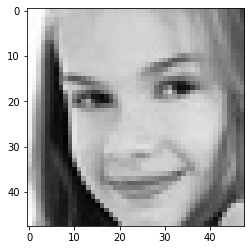

In [20]:
plt.imshow(img, cmap = 'gray')